## What is AB Testing?

A/B testing is a way to compare two versions of a single variable, typically by testing a subject's response to variant A against variant B, and determining which of the two variants is more effective.

we will apply A/B test for a business problem.

A/B testing (also known as bucket testing or split-run testing) is a user experience research methodology.A/B tests consist of a randomized experiment with two variants, A and B. It includes application of statistical hypothesis testing or "two-sample hypothesis testing" as used in the field of statistics. A/B testing is a way to compare two versions of a single variable, typically by testing a subject's response to variant A against variant B, and determining which of the two variants is more effective.

The purpose of A/B testing is to enable you to make incremental improvements to your website or app. By comparing your existing website or app to one or more variations, you can continually iterate your design and validate it with real users. With A/B testing, each test generates new data about what works and what doesn't. Whenever something works, it can be incorporated into that website or app and now creates a new and improved design.

If there is a numerical or proportional difference between them, did this happen by chance or a significant difference? Based on this question; We have to decide which a/b testing we should apply based on the circumstances.

###  Business Problem

The colors of the buttons on the website have been changed. As a result of these changes, the click rate was calculated. Hypothesis testing; It allows us to calculate statistically whether there is a significant difference between these two ratios.

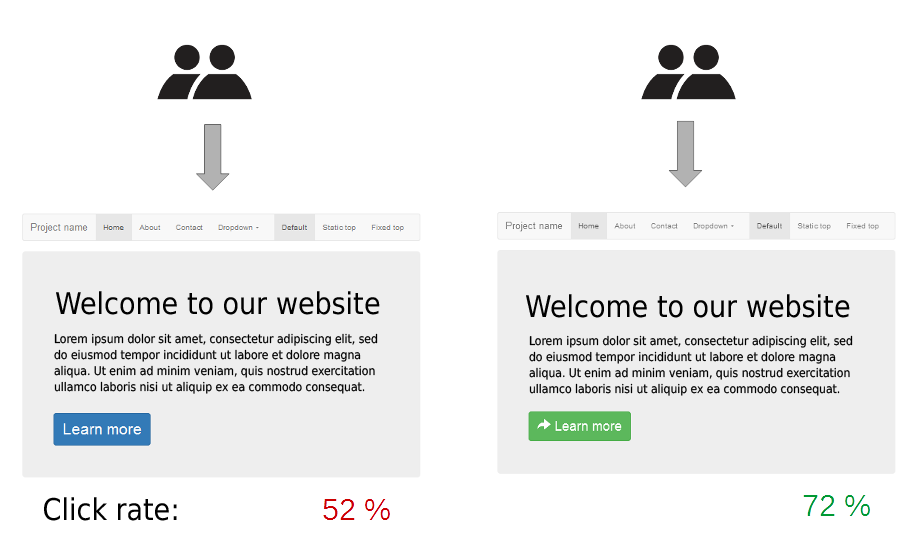

company recently made new change to purchase button with blue and green color. Company decided to test this feature and check if there is any significant difference between the purchase.

### Dataset Story



In this dataset, which contains the website information of ........ ,information of user are number of ads they saw and clicked on, purchase frequency.
There are two separate data sets, the control and test groups.

### Variables

* Impression – Ad views
* Click – Clicks >> Indicates the number of clicks on the displayed ad.
* Purchase >> Indicates the number of products purchased after the ads clicked.
* Earning – Earning >> Earnings after purchased products

## Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest

In [2]:
## control group

df_control_group = pd.read_excel("c:/users/shekh/Desktop/GitProjects/AB Testing/ab_testing.xlsx", sheet_name="Control Group")
control_group = df_control_group[['Impression','Click','Purchase','Earning']]
control_group.head()

,Impression,Click,Purchase,Earning
0,82529.459271,6090.077317,665.211255,2311.277143
1,98050.451926,3382.861786,315.084895,1742.806855
2,82696.023549,4167.965750,458.083738,1797.827447
3,109914.400398,4910.882240,487.090773,1696.229178
4,108457.762630,5987.655811,441.034050,1543.720179


In [4]:
control_group = control_group[['Impression','Click','Purchase','Earning']].astype(int)

In [5]:
df_test_group = pd.read_excel("c:/users/shekh/Desktop/GitProjects/AB Testing/ab_testing.xlsx", sheet_name="Test Group")
test_group = df_test_group[['Impression','Click','Purchase','Earning']]
test_group.head()

,Impression,Click,Purchase,Earning
0,120103.503796,3216.547958,702.160346,1939.611243
1,134775.943363,3635.082422,834.054286,2929.405820
2,107806.620788,3057.143560,422.934258,2526.244877
3,116445.275526,4650.473911,429.033535,2281.428574
4,145082.516838,5201.387724,749.860442,2781.697521


In [7]:
df_test_group = df_test_group[['Impression','Click','Purchase','Earning']].astype(int)

In [9]:
## if there is missing values in any group
control_group.isnull().sum(),test_group.isnull().sum()

(Impression    0
 Click         0
 Purchase      0
 Earning       0
 dtype: int64,
 Impression    0
 Click         0
 Purchase      0
 Earning       0
 dtype: int64)

### Hypothesis Definition of A/B Test

 * H0 (M1 = M2) : There is no statistically significant difference between purchase button with blue and green color.

 * H1 (M1 != M2) :  There is statistically significant difference between purchase button with blue and green color.

### Assumption Control

In [10]:
# Firstly, let's look at the mean of both groups

print("The purchase mean of control group: ", control_group["Purchase"].mean())
print("The purchase mean of test group: ", test_group["Purchase"].mean())

The purchase mean of control group:  550.5
The purchase mean of test group:  582.1060966484675


At the first glance, there is a difference between the means of groups. But, A/B test is performed to see if this difference is a coincidence and is statistically meaningful.

#### Normality Assumption

The Hypothesis of Normality Assumption (Shapiro-Wilk Test)

* H0: Normality assumption is provided.
* H1: Normality assumption is not provided.

In [11]:
test_stat_test, pvalue_test = shapiro(test_group["Purchase"])
print('For Test Group: Test Stat = %.4f, p-value = %.4f' % (test_stat_test, pvalue_test)) 

test_stat_control, pvalue_control = shapiro(control_group["Purchase"])
print('For Control Group: Test Stat = %.4f, p-value = %.4f' % (test_stat_control, pvalue_control)) 

For Test Group: Test Stat = 0.9589, p-value = 0.1541
For Control Group: Test Stat = 0.9772, p-value = 0.5852





The H0 hypothesis can not be rejected because of the p-value > 0.05. So, normality assumption is provided and data has a normal distribution for both group.

#### Variance Homogeneity Assumption (Levene Test)

* H0: Variances are homogeneous.
* H1: Variances are not homogeneous.

when homogeneity of variance is violated there is a greater probability of falsely rejecting the null hypothesis. So we need to test for Homogenity of variance

In [12]:
test_stat, pvalue = levene(df_test_group["Purchase"], df_control_group["Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue)) 

Test Stat = 2.6415, p-value = 0.1081


The H0 hypothesis can not be rejected because of the p-value > 0.05. So, variances are homogeneous.

### Independent Two Sample T-Test

Independent two sample T-test is performed because of both assumption is provided.

In [13]:
test_stat, pvalue = ttest_ind(df_test_group["Purchase"], df_control_group["Purchase"], equal_var=True)
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue)) 

Test Stat = 0.9263, p-value = 0.3571


#### The above stated H0 hypothesis of A/B test can not be rejected because of p-value > 0.05. So, There is no statistically significant difference between purchases button with blue and green color with 95% confidence.